# Data Analysis of Metal Organic Profile

#### This is a project to investigate how 
SBET(m2/g)-bet surface

SL(m2/g) - largest cavity diameter 

VT(cm3/g) - pore volume 

Influences the CO2 update capacity of the metal organic profile

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('future.no_silent_downcasting', True)

In [2]:
# read dataset in 
df = pd.read_excel('data/mof_dataset.xlsx')

# inspect first five enteries
df.head(5)

,Sample,SBET(m2/g),SL(m2/g),VT(cm3/g),P(kPa),T(K),Mental center,Uptake
0,"Al(OH)(bdc)(Arstad et al., 2008)",1300.0,,0.42,100,298,Al,2.388410
1,"Al(OH)(bdc-NH2)(Arstad et al., 2008)",960.0,NaN,0.25,100,298,Al,2.732163
2,"Ni2(bdc)2(dabco)(Arstad et al., 2008)",1925.0,NaN,0.74,100,298,Ni,2.276802
3,"Ni2(bdc)2(dabco)(Arstad et al., 2008)",1530.0,NaN,0.50,100,298,Ni,3.187523
4,"Zn(bdc)(ted)0.5 (Raja et al., 2015)",1937.0,2057,0.75,100,298,Zn,1.683048


In [3]:

# inspect last five entries
df.tail(5)

,Sample,SBET(m2/g),SL(m2/g),VT(cm3/g),P(kPa),T(K),Mental center,Uptake
245,"SNU-70(Prasad and Suh, 2012)",5290.0,6100,2.17,100,298,Zn,0.8
246,"FJI-H14(Liang et al., 2017)",904.0,1004,0.45,100,195,Cu,12.5
247,"FJI-H14(Liang et al., 2017)",904.0,1004,0.45,100,298,Cu,7.6
248,"Ni(BPEB)(Galli et al., 2014)",1900.0,2378,1.00,100,195,Ni,11.6
249,"α-[Zn(BPEB)](Galli et al., 2014)",985.0,1224,0.60,100,195,Zn,11.3


In [4]:
# # Rename the features to minimize typing
# columns = df.columns
# new_columns = ['sbet', 'sl', 'vt', 'p', 't','metal_center', 'update']
# df = df.rename(columns = {'SBET(m2/g)':"sbet", 'SL(m2/g)':'sl', 'VT(cm3/g)':'vt', 'P(kPa)':'p', 'T(K)':'t','Mental center':'metal_center', 'Uptake':'update'})

In [5]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sample         250 non-null    object 
 1   SBET(m2/g)     225 non-null    float64
 2   SL(m2/g)       124 non-null    object 
 3   VT(cm3/g)      164 non-null    float64
 4   P(kPa)         250 non-null    int64  
 5   T(K)           250 non-null    int64  
 6   Mental center  250 non-null    object 
 7   Uptake         250 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 15.8+ KB


In [6]:
# describe the dataset 
print(df.describe())

        SBET(m2/g)   VT(cm3/g)       P(kPa)        T(K)      Uptake
count   225.000000  164.000000   250.000000  250.000000  250.000000
mean   1370.618756    0.586512   432.640000  288.148000    4.268618
std     968.599843    0.442267   941.473761   17.638895    5.435044
min      30.000000    0.037000    10.000000  195.000000    0.093000
25%     732.000000    0.320000   100.000000  273.000000    1.391751
50%    1084.000000    0.457500   100.000000  298.000000    2.408134
75%    1859.250000    0.710000   100.000000  298.000000    3.887164
max    5290.000000    2.300000  4000.000000  313.000000   26.300000


In [7]:
# checking null values
print(df.isnull().any())

Sample           False
SBET(m2/g)        True
SL(m2/g)          True
VT(cm3/g)         True
P(kPa)           False
T(K)             False
Mental center    False
Uptake           False
dtype: bool


In [8]:
# functions
def missing_values_table(df):
    # total missing values
    mis_val = df.isnull().sum()

    # percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing values', 1:'% of total values' })

    # sort the table by percentage of missing descending
#    mis_val_table_ren_columns = [mis_val_table_ren_columns.iloc[:,1] != 0].sort_value('% of total values', ascending=False).round(1)

    # print some summary information 
    print('Your selected dataframe has ' + str(df.shape[1]) + 'columns \n There are ' + str(mis_val_table_ren_columns.shape[0]) + "columns have missing values.")

    # return the dataframe with missing information 
    return mis_val_table_ren_columns

### Data Cleaning

In [9]:
missing_values_table(df)

Your selected dataframe has 8columns 
 There are 8columns have missing values.


,Missing values,% of total values
Sample,0,0.0
SBET(m2/g),25,10.0
SL(m2/g),126,50.4
VT(cm3/g),86,34.4
P(kPa),0,0.0
T(K),0,0.0
Mental center,0,0.0
Uptake,0,0.0


In [10]:
# df['SBET(m2/g)'] is clean
df['SBET(m2/g)'].isnull().any().sum()

np.int64(1)

In [11]:
# investigage sbet
# from the describe above, it is evident that there could be an 
# outlier in df['sbet'] given max value 5290 and 75% being 1859
# missing values will be filled with the mode that is not affected by outlier
df['SBET(m2/g)'] = df['SBET(m2/g)'].fillna(value = df['SBET(m2/g)'].mode()[0])
df['VT(cm3/g)'] = df['VT(cm3/g)'].fillna(value = df['VT(cm3/g)'].mode()[0])
df['SL(m2/g)'] = df['SL(m2/g)'].fillna(value = df['SL(m2/g)'].mode()[0])

# confirm missing values filled
missing_values_table(df)

Your selected dataframe has 8columns 
 There are 8columns have missing values.


,Missing values,% of total values
Sample,0,0.0
SBET(m2/g),0,0.0
SL(m2/g),0,0.0
VT(cm3/g),0,0.0
P(kPa),0,0.0
T(K),0,0.0
Mental center,0,0.0
Uptake,0,0.0


In [12]:
# on an attempt to convert df['SL(m2/g)'] to float, not int because int will cause some data loss,
# it was reported that string cannot be converted to float
# on investigation show below, it was discovered that some entries might not be just be NaN, Not a Number, but empty string

df['SL(m2/g)'][:5]

0        
1     110
2     110
3     110
4    2057
Name: SL(m2/g), dtype: object

In [13]:
# Get the indices of all empty string values
for i in df['SL(m2/g)']:
    if type(i) == str:
        print(f"i = '{i}'")
        print(list(df['SL(m2/g)']).index(i))


i = ' '
0


In [14]:
# replace df['SL(m2/g)'] with df['SL(m2/g)'].mode()[0]
df['SL(m2/g)'] = df['SL(m2/g)'].replace(' ', df['SL(m2/g)'].mode()[0])

In [15]:
# make sure no empty string exists in the data frame
df.replace(' ', df['SL(m2/g)'].mode()[0], inplace = True)
df['SL(m2/g)'][:5]

0     110
1     110
2     110
3     110
4    2057
Name: SL(m2/g), dtype: object

In [16]:
# convert df['SL(m2/g)'] to float
df['SL(m2/g)'] = df['SL(m2/g)'].apply(lambda x : float(x) )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sample         250 non-null    object 
 1   SBET(m2/g)     250 non-null    float64
 2   SL(m2/g)       250 non-null    float64
 3   VT(cm3/g)      250 non-null    float64
 4   P(kPa)         250 non-null    int64  
 5   T(K)           250 non-null    int64  
 6   Mental center  250 non-null    object 
 7   Uptake         250 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 15.8+ KB


### **Exploratory Data Analysis**

#### **Univariate Analysis**

### SL(m2/g)

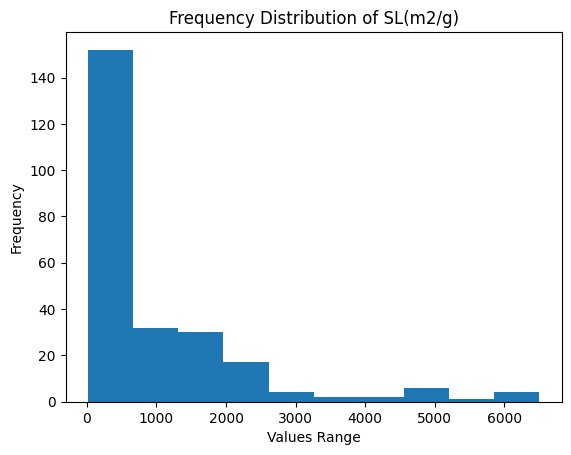

In [17]:
plt.hist(df['SL(m2/g)'])
plt.title("Frequency Distribution of SL(m2/g)")
plt.xlabel('Values Range')
plt.ylabel('Frequency')
plt.show();

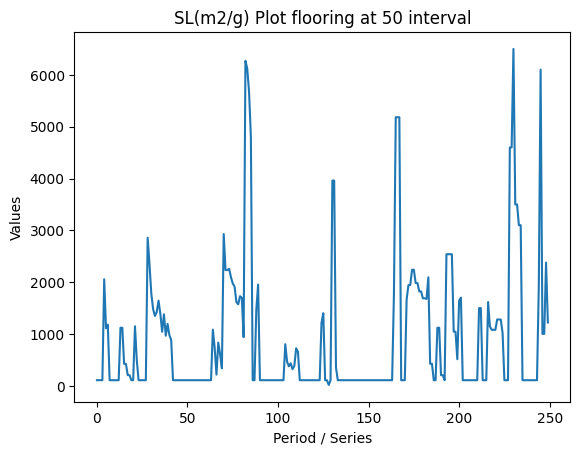

In [18]:
plt.plot(df['SL(m2/g)'])
plt.title("SL(m2/g) Plot flooring at 50 interval")
plt.xlabel("Period / Series")
plt.ylabel("Values")
plt.show();

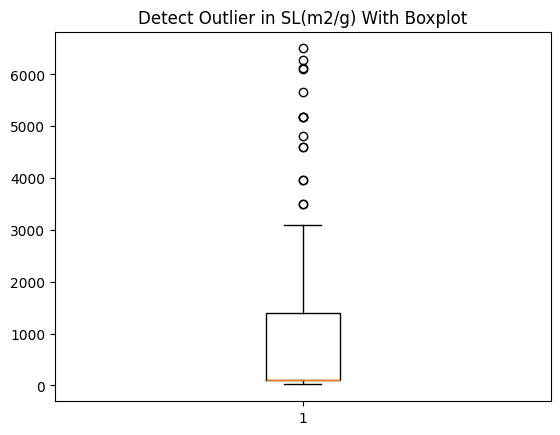

In [19]:
# checking outlier with boxplot
plt.boxplot(df['SL(m2/g)'])
plt.title("Detect Outlier in SL(m2/g) With Boxplot")
plt.show();

### SBET(m2/g)

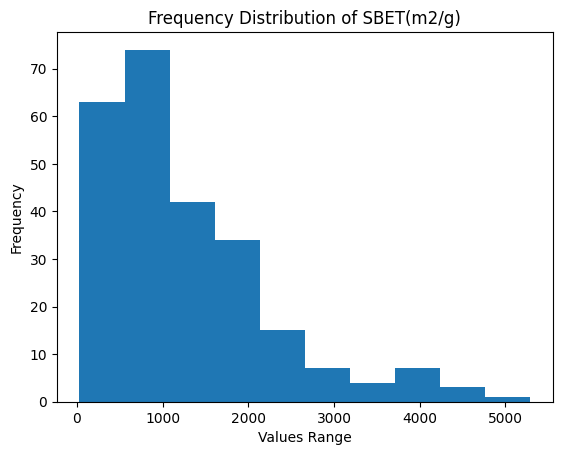

In [20]:
plt.hist(df['SBET(m2/g)'])
plt.title("Frequency Distribution of SBET(m2/g)")
plt.xlabel('Values Range')
plt.ylabel('Frequency')
plt.show();

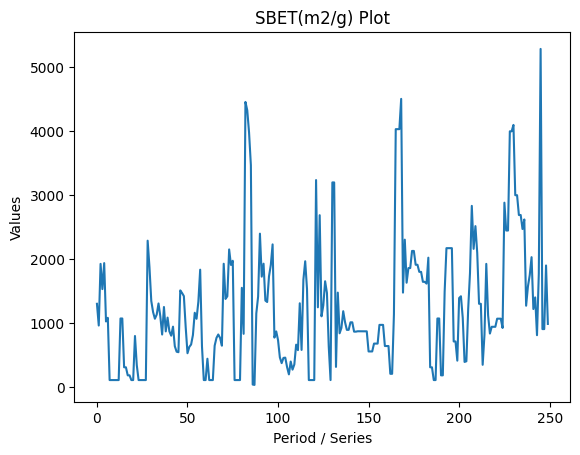

In [21]:
plt.plot(df['SBET(m2/g)'])
plt.title("SBET(m2/g) Plot")
plt.xlabel("Period / Series")
plt.ylabel("Values")
plt.show();

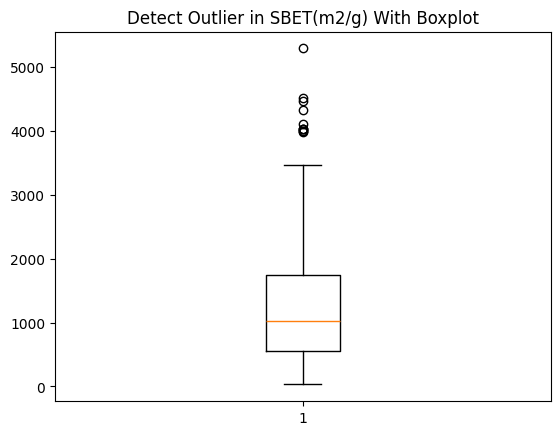

In [22]:
# checking outlier with boxplot
plt.boxplot(df['SBET(m2/g)'])
plt.title("Detect Outlier in SBET(m2/g) With Boxplot")
plt.show();

### VT(cm3/g)

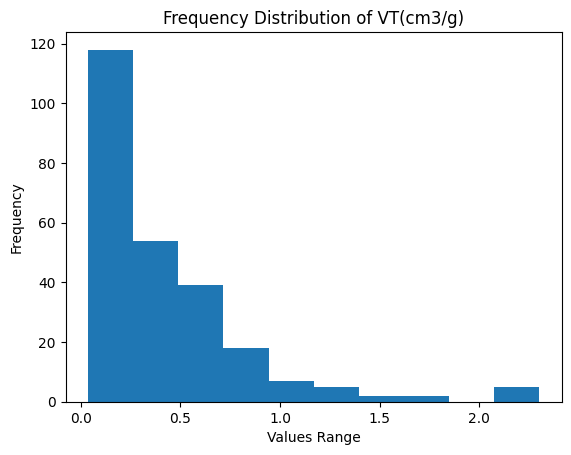

In [24]:
plt.hist(df['VT(cm3/g)'])
plt.title("Frequency Distribution of VT(cm3/g)")
plt.xlabel('Values Range')
plt.ylabel('Frequency')
plt.show();

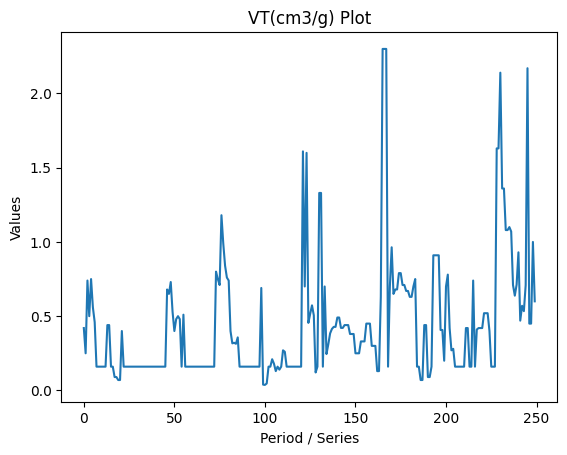

In [25]:
plt.plot(df['VT(cm3/g)'])
plt.title("VT(cm3/g) Plot")
plt.xlabel("Period / Series")
plt.ylabel("Values")
plt.show();

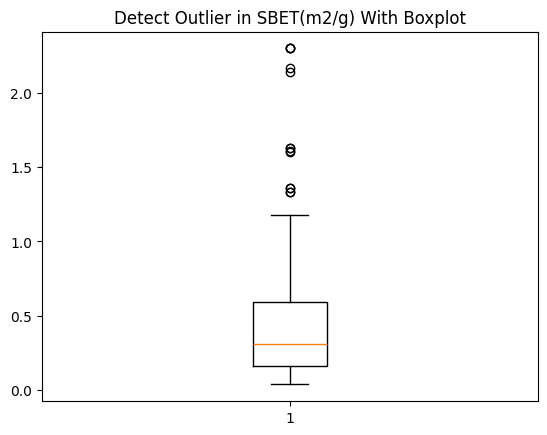

In [27]:
# checking outlier with boxplot
plt.boxplot(df['VT(cm3/g)'])
plt.title("Detect Outlier in SBET(m2/g) With Boxplot")
plt.show();

### P(kPa)

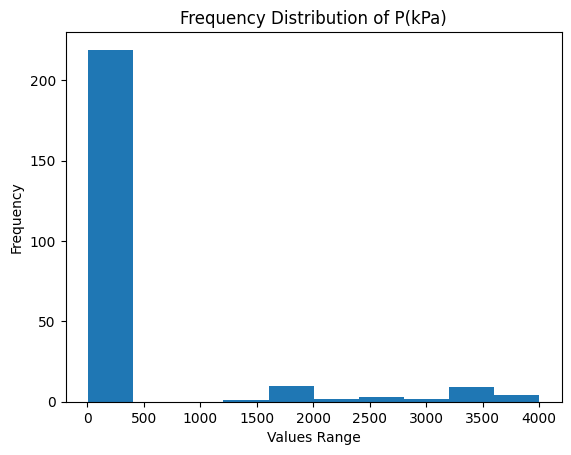

In [30]:
plt.hist(df['P(kPa)'])
plt.title("Frequency Distribution of P(kPa)")
plt.xlabel('Values Range')
plt.ylabel('Frequency')
plt.show();

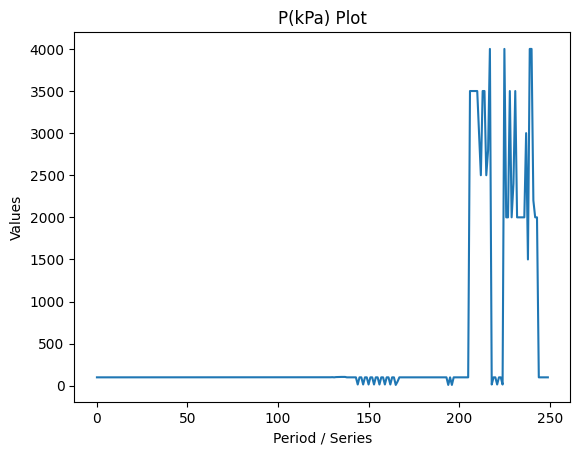

In [29]:
plt.plot(df['P(kPa)'])
plt.title("P(kPa) Plot")
plt.xlabel("Period / Series")
plt.ylabel("Values")
plt.show();

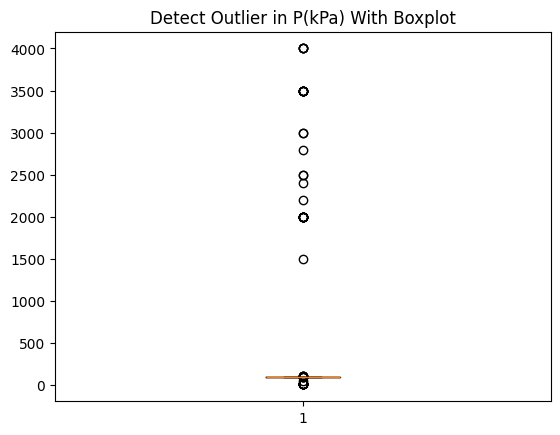

In [32]:
# checking outlier with boxplot
plt.boxplot(df['P(kPa)'])
plt.title("Detect Outlier in P(kPa) With Boxplot")
plt.show();

### T(K)

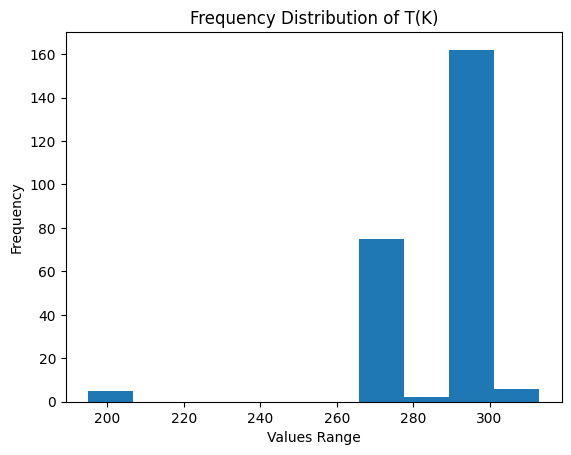

In [35]:
plt.hist(df['T(K)'])
plt.title("Frequency Distribution of T(K)")
plt.xlabel('Values Range')
plt.ylabel('Frequency')
plt.show();

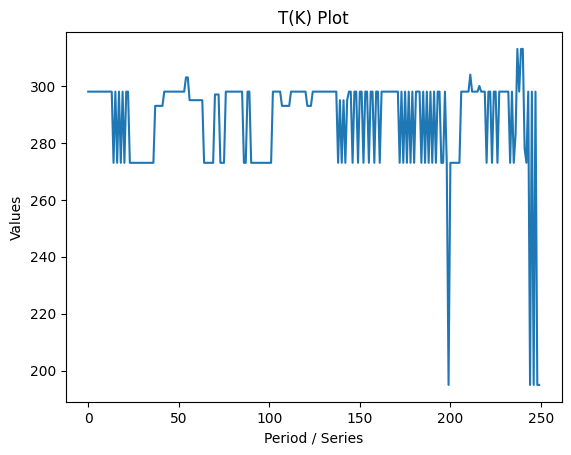

In [34]:
plt.plot(df['T(K)'])
plt.title("T(K) Plot")
plt.xlabel("Period / Series")
plt.ylabel("Values")
plt.show();

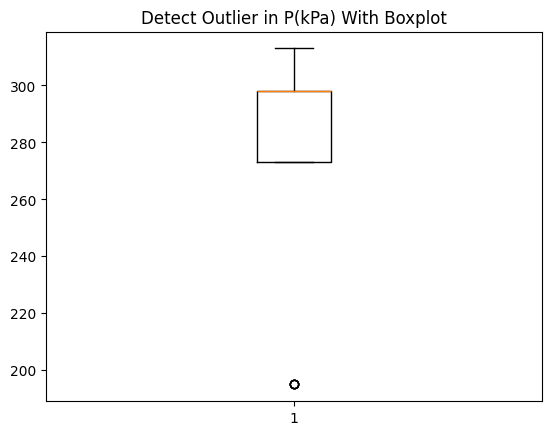

In [33]:
# checking outlier with boxplot
plt.boxplot(df['T(K)'])
plt.title("Detect Outlier in T(K) With Boxplot")
plt.show();


### Update

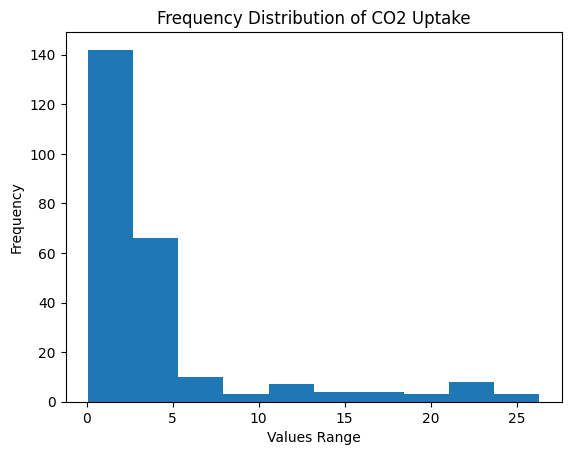

In [42]:
plt.hist(df['Uptake'])
plt.title("Frequency Distribution of CO2 Uptake")
plt.xlabel('Values Range')
plt.ylabel('Frequency')
plt.show();

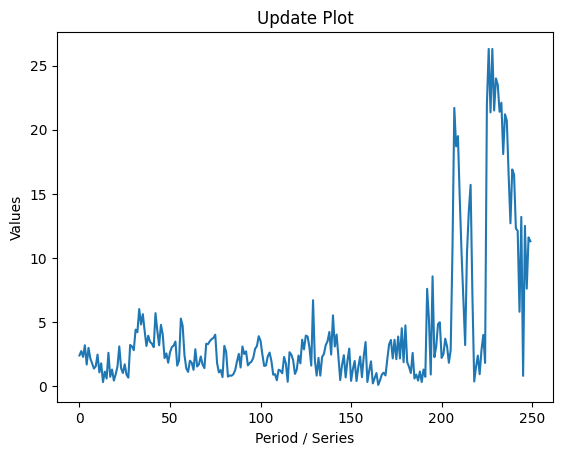

In [38]:
plt.plot(df['Uptake'])
plt.title("Update Plot")
plt.xlabel("Period / Series")
plt.ylabel("Values")
plt.show();

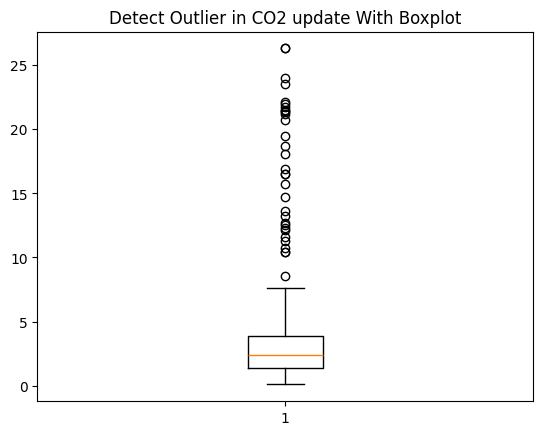

In [37]:
# checking outlier with boxplot
plt.boxplot(df['Uptake'])
plt.title("Detect Outlier in CO2 update With Boxplot")
plt.show();


In [73]:
df1 = df[(df['SL(m2/g)'] < 2550) & (df['SBET(m2/g)'] < 3000) & (df['VT(cm3/g)'] < 1.25)]
df1.shape


(228, 8)

### **Bivariate Analysis**

outliers in df['sl(m2/g)'] is from about value of 3200

outliers in df['SBET(m2/g)'] is from about value of 3500

outlier in df['vt'] is from about value of 1.25

In [94]:

# Exploratory Data Analysis
## Mononvariate analysis

df.isnull().any()

Sample           False
SBET(m2/g)       False
SL(m2/g)         False
VT(cm3/g)        False
P(kPa)           False
T(K)             False
Mental center    False
Uptake           False
dtype: bool